# Lecture Notes and Slides

See https://github.com/lmarti/evolutionary-computation-course/blob/master/AEC.02%20-%20Elements%20of%20Evolutionary%20Algorithms.ipynb
for many useful details

In [ ]:
# Rough sketch of a GA, based on 
# https://github.com/lmarti/evolutionary-computation-course/blob/
# master/AEC.02%20-%20Elements%20of%20Evolutionary%20Algorithms.ipynb

def genetic_algorithm():
    population = np.empty((max_time_steps, pop_size))

    population[0] = initialize_population(pop_size)
    t = 0 # time-step

    while not stop_criterion(population[t]):
        fitness = evaluate(population[t])
        offspring = crossover_and_variation(population[t],
                                          fitness)
        populations[t+1] = environmental_selection(
                                          population[t],
                                          offspring)
        t += 1

In [10]:
from random import randint

# Create an individual with a 'chromosome' with *size* elements
def initialize_one(size, min_value, max_value):
    return [ randint(min_value,max_value) for x in range(size)]

# Create a population of individuals
def initialize_population(pop_size, indiv_size, min_value, max_value):
    return [initialize_one(indiv_size, min_value, max_value) \
            for x in range(pop_size)]

In [13]:
my_pop = initialize_population(100, 3, 0, 100)

my_pop

[[42, 2, 30],
 [84, 88, 23],
 [23, 88, 29],
 [20, 94, 19],
 [40, 67, 10],
 [22, 15, 14],
 [73, 95, 47],
 [30, 95, 91],
 [7, 57, 69],
 [99, 73, 59],
 [14, 62, 19],
 [16, 83, 12],
 [80, 41, 22],
 [94, 68, 80],
 [36, 56, 32],
 [77, 82, 84],
 [56, 82, 22],
 [18, 62, 18],
 [32, 4, 82],
 [54, 71, 15],
 [18, 27, 0],
 [73, 86, 43],
 [89, 80, 89],
 [25, 23, 2],
 [76, 70, 12],
 [41, 25, 62],
 [53, 18, 92],
 [83, 14, 21],
 [79, 4, 31],
 [91, 41, 28],
 [52, 56, 41],
 [62, 63, 68],
 [99, 85, 4],
 [10, 92, 3],
 [39, 32, 94],
 [18, 91, 95],
 [19, 97, 64],
 [71, 97, 47],
 [85, 14, 43],
 [23, 4, 8],
 [33, 85, 66],
 [30, 33, 87],
 [61, 30, 50],
 [56, 91, 79],
 [11, 74, 51],
 [34, 48, 78],
 [2, 80, 45],
 [42, 52, 19],
 [41, 28, 81],
 [13, 14, 100],
 [29, 70, 26],
 [38, 27, 11],
 [2, 97, 77],
 [98, 73, 26],
 [73, 12, 18],
 [82, 22, 46],
 [38, 21, 83],
 [49, 87, 87],
 [77, 78, 49],
 [47, 71, 84],
 [10, 82, 25],
 [81, 16, 100],
 [80, 83, 77],
 [74, 66, 49],
 [92, 69, 6],
 [10, 74, 55],
 [31, 15, 10],
 [3, 4

In [27]:
from operator import add
from functools import reduce

# Return the fitness of an individual, by
# comparing its sum to the optimal
def indiv_fitness(individual, optimal):
    sum = reduce(add, individual, 0)
    return abs(optimal - sum)

def population_fitness(population, optimal):
    summed = reduce(add, (indiv_fitness(x, optimal) \
                          for x in population), 0)
    return summed / float(len(population))

In [30]:
indiv_fitness(my_pop[33], 200)

95

In [31]:
population_fitness(my_pop, 200)

63.21

In [45]:
import random

# randomly add individuals to promote genetic diversity
def add_random(parents, graded, retain_length, random_select):
    for individual in graded[retain_length:]:
        if random_select > random.random():
            parents.append(individual)
            
# mutate some individuals
def mutate(parents, mutation):
    for individual in parents:
        if mutation > random.random():
            pos_to_mutate = randint(0, len(individual)-1)
            individual[pos_to_mutate] = randint(
                min(individual), max(individual))

# crossover parents to create children
def crossover(parents, pop):
    parents_length = len(parents)
    desired_length = len(pop) - parents_length
    children = []
    while len(children) < desired_length:
        parent1 = randint(0, parents_length-1)
        parent2 = randint(0, parents_length-1)
        if parent1 != parent2:
            parent1 = parents[parent1]
            parent2 = parents[parent2]
            half = int(len(parent1) / 2)
            child = parent1[:half] + parent2[half:]
            children.append(child)
    return children

def evolve(pop, target, retain=0.2, random_select=0.05, mutation=0.01):
    # pairs (score, indiv)
    graded = [ (indiv_fitness(x, target), x) for x in pop]
    # sort them by grade -- ascending order
    graded = [ x[1] for x in sorted(graded)]
    
    # we can drop the really unfit ones
    retain_length = int(len(graded)*retain)
    parents = graded[:retain_length]
    # add more random individuals to go back to full population
    add_random(parents, graded, retain_length, random_select)
    
    mutate(parents, mutation)
    children = crossover(parents, pop)

    parents.extend(children)
    return parents


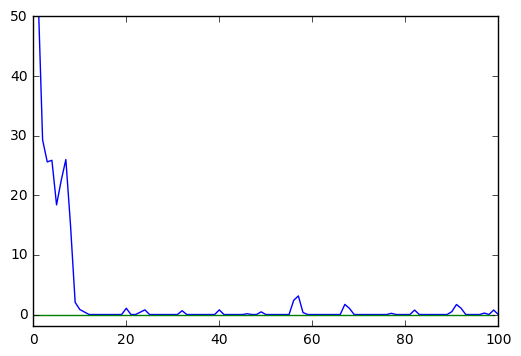

In [54]:
import matplotlib.pyplot as plt
import numpy as np

target = 374
p_count = 100
i_length= 5
i_min = 0
i_max = 100

p = initialize_population(p_count, i_length, i_min, i_max)
fitness_history = [population_fitness(p, target),]

for i in range(100):
    p = evolve(p, target)
    new_fitness = population_fitness(p, target)
    fitness_history.append(new_fitness)
    

ref = np.zeros((100))
plt.ylim((-2,50))
plt.plot(fitness_history)
plt.plot(ref)